In [1]:
# Notebook to explore more serious convolutional networks 
# i.e. includes analysis of training and test accuracies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from core_functions import SensorSignals

# Model with usual halving of image size and doubling the depth
class CNN_STANDARD(nn.Module):    
    def __init__(self):
        super(CNN_STANDARD, self).__init__()

        self.conv = nn.Sequential(    # Convolutional part, 3 layers
            nn.Conv1d(1, 4, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv1d(4, 8, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv1d(8, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
        )
        self.fc = nn.Sequential(        # Fully connected part, 3 layers
            nn.Linear(16 * 4, 384),
            nn.ReLU(),
            nn.Linear(384, 128),
            nn.ReLU(),
            nn.Linear(128, 3)
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.shape[0], -1)
        x = self.fc(x)
        return x

In [2]:
dataPath = "./second_collection_triggs_rels_32.npz"
S = SensorSignals(dataPath) 
S.split_data()
S.norm_X()
S.setup_tensors()
S.print_shapes()

models, models_losses, models_acc, models_label = [], [], [], []
for i, lr in enumerate([5e-3]):

    model = CNN_STANDARD() 

    # Train
    S.train_model(model, learning_rate=lr, batch_size=128, max_epochs=50, weight_decay=1e-4)

    models.append(model)
    models_losses.append(S.losses)
    models_acc.append(S.accuracies)
    models_label.append(f"model {i}")


Train, Test and Validation set were normalized!
Using Device:  cpu , dtype:  torch.float32
Raw data shape:  (7891, 32)
Labels shape:  (7891,)
Unique labels:  [0 1 2]
Shape of test set: (1184, 32)
Shape of train set: (5700, 32)
Shape of validation set: (1007, 32)
Fraction of single class in test set:  0.2981418918918919
Epoch 1, Batch 1: loss=4.172, train=38.6%, val=40.5%
Epoch 2, Batch 1: loss=0.873, train=60.0%, val=58.2%
Epoch 3, Batch 1: loss=0.711, train=60.9%, val=60.4%
Epoch 4, Batch 1: loss=0.697, train=69.8%, val=69.9%
Epoch 5, Batch 1: loss=0.596, train=72.4%, val=74.0%
Epoch 6, Batch 1: loss=0.634, train=74.0%, val=75.8%
Epoch 7, Batch 1: loss=0.651, train=74.7%, val=76.1%
Epoch 8, Batch 1: loss=0.547, train=76.5%, val=77.7%
Epoch 9, Batch 1: loss=0.483, train=76.0%, val=76.6%
Epoch 10, Batch 1: loss=0.549, train=78.0%, val=78.3%
Epoch 11, Batch 1: loss=0.602, train=75.3%, val=77.2%
Epoch 12, Batch 1: loss=0.591, train=78.4%, val=78.2%
Epoch 13, Batch 1: loss=0.442, train=80

Accuracy of test set of best model (idx=0): 87.0%


0.8699324324324325

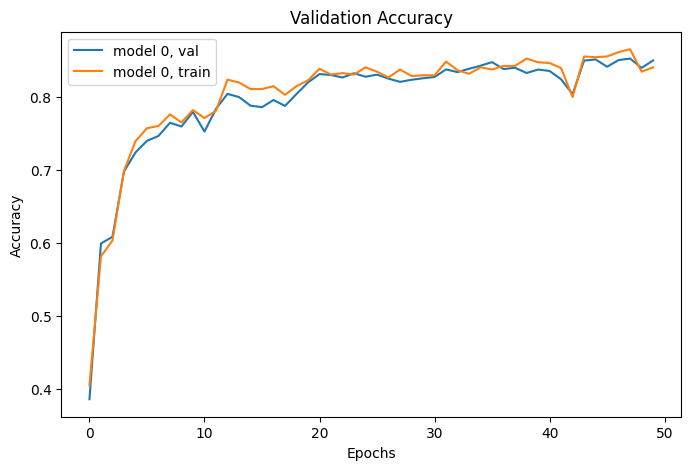

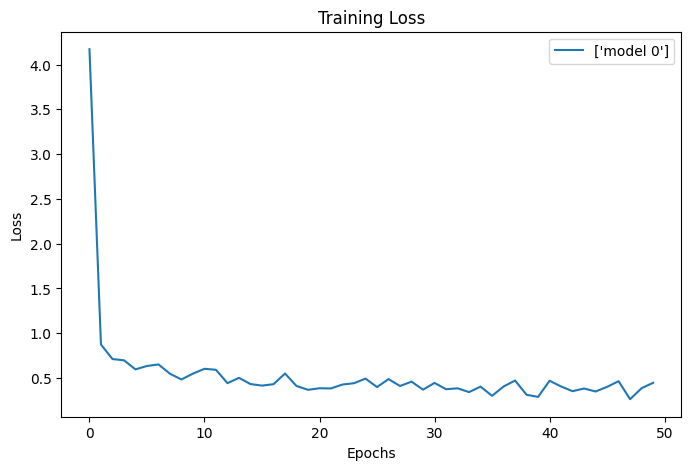

In [3]:
# Plot results from training
def plotAcc(models_label, models_acc):
    """ Plot validation accuracies to determine best model """
    plt.figure(figsize=(8, 5))
    plt.title("Validation Accuracy")
    for lab, accs in zip(models_label, models_acc):
        plt.plot(np.arange(accs.shape[0]), accs, label=[lab+", val", lab+", train"])
    plt.legend()
    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")


def plotLosses(models_label, models_losses):
    """ Plot validation accuracies to determine best model """
    plt.figure(figsize=(8, 5))
    plt.title("Training Loss")
    models_losses = np.array(models_losses)
    plt.plot(np.arange(models_losses.shape[1]), models_losses.T, label=models_label)
    plt.legend()
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    
    
def bestModelAcc(models, models_acc, S):
    """
    Prints test accuracy of best model
    Chooses model that yields the best validation accuracy
    S is object containing the data used during training 
    """
    best_acc_idx = np.argmax([acc[-1, -1] for acc in models_acc])
    best_model = models[best_acc_idx]
    best_acc = S.acc_te(best_model)
    print(f"Accuracy of test set of best model (idx={best_acc_idx}): {best_acc*100:.1f}%")
    return best_acc 

# Plot
plotAcc(models_label, models_acc)
plotLosses(models_label, models_losses)
# Print accuracy
bestModelAcc(models, models_acc, S)


Train, Test and Validation set were normalized!
Using Device:  cpu , dtype:  torch.float32
Raw data shape:  (7931, 30)
Labels shape:  (7931,)
Unique labels:  [0 1 2]
Shape of test set: (1190, 30)
Shape of train set: (5729, 30)
Shape of validation set: (1012, 30)
Fraction of single class in test set:  0.3033613445378151
Epoch 1, Batch 1: loss=1.100, train=39.1%, val=36.6%
Epoch 2, Batch 1: loss=0.845, train=63.0%, val=63.4%
Epoch 3, Batch 1: loss=0.769, train=69.2%, val=70.3%
Epoch 4, Batch 1: loss=0.697, train=69.7%, val=70.2%
Epoch 5, Batch 1: loss=0.565, train=72.0%, val=73.2%
Epoch 6, Batch 1: loss=0.563, train=76.2%, val=77.8%
Epoch 7, Batch 1: loss=0.400, train=77.6%, val=79.2%
Epoch 8, Batch 1: loss=0.595, train=76.9%, val=78.1%
Epoch 9, Batch 1: loss=0.532, train=77.5%, val=79.4%
Epoch 10, Batch 1: loss=0.556, train=81.3%, val=82.1%
Epoch 11, Batch 1: loss=0.516, train=80.2%, val=80.9%
Epoch 12, Batch 1: loss=0.619, train=79.2%, val=79.2%
Epoch 13, Batch 1: loss=0.406, train=78

TypeError: bestModelAcc() takes 1 positional argument but 3 were given

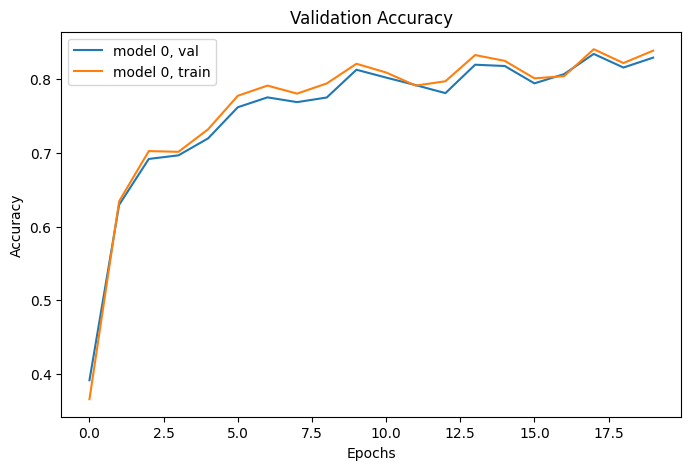

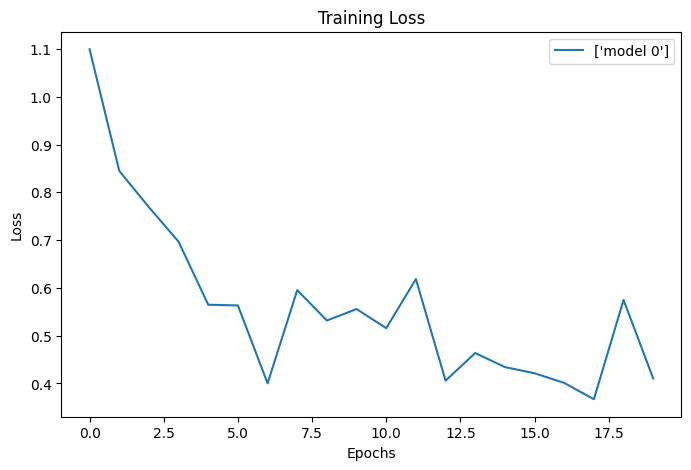

In [5]:
# Convolutional architecture with 3 layers
# Investigate how number of channels and kernel size changes the results

# class CNN2(nn.Module):    
#     def __init__(self, channels, kernels, h_neurons, p_drop):
#         super(CNN2, self).__init__()
#      
#         ch1, ch2, ch3 = channels
#         k1, k2, k3 = kernels
#         pad1, pad2, pad3 = int((k1-1)/2), int((k2-1)/2), int((k3-1)/2)
#         h1, h2 = h_neurons
#         p1, p2, p3 = p_drop
#
#         self.conv = nn.Sequential(    # Convolutional part, 3 layers
#             nn.Conv1d(1, ch1, kernel_size=k1, padding=pad1),
#             nn.Dropout(p1),
#             nn.ReLU(),
#             nn.Conv1d(ch1, ch2, kernel_size=k2, padding=pad2),
#             nn.Dropout(p2),
#             nn.ReLU(),
#             nn.Conv1d(ch2, ch3, kernel_size=k3, padding=pad3),
#             nn.Dropout(p3),
#             nn.ReLU(),
#             nn.MaxPool1d(4)   # Single pool layer with kernel=4 gave better results than 2 pool layers with kernel=2
#         )
#         self.fc = nn.Sequential(        # Fully connected part, 3 layers
#             nn.Linear(ch3 * 7, h1),
#             nn.ReLU(),
#             nn.Linear(h1, h2),
#             nn.ReLU(),
#             nn.Linear(h2, 3)
#         )
#
#     def forward(self, x):
#         x = self.conv(x)
#         x = x.view(x.shape[0], -1)
#         x = self.fc(x)
#         return x
#
# # Fix kernels
# kernels = [5, 5, 5]
# # Test 3 different channels
# channels = [16, 16, 16]      # Keep sizes of channels the same because there is not reduction in the image
# # Test different sizes of hidden layers 
# h_neurons = [300, 200]
# # Test different rates of Dropout
# p_drop = [[0, 0, 0]]
#
# #Run training  
# # Initialize results
# G = SensorSignals("./second_collection_triggs_rels.npz") 
# G.split_data()
# G.norm_X()
# G.setup_tensors()
# G.print_shapes()
#
# models, models_losses, models_acc, models_label = [], [], [], []
# for i, pp in enumerate(p_drop):
#
#     model = CNN2(channels, kernels, h_neurons, pp)
#
#     # Train
#     G.train_model(model, learning_rate=5e-3, batch_size=128, max_epochs=20, weight_decay=1e-4)
#
#     models.append(model)
#     models_losses.append(G.losses)
#     models_acc.append(G.accuracies)
#     models_label.append(f"model {i}")
#
# plotAcc(models_label, models_acc)
# plotLosses(models_label, models_losses)
# acc_best_FC = bestModelAcc(models, models_acc, G)
#